In [25]:
import matplotlib.pylab as plt
import numpy as np

In [26]:
np.log10(.5)/np.log10(.99)

68.96756393652844

In [99]:
def price_adjustment(x):
    return round(x*.99,2)

In [100]:
def price_check(original_price, current_price):
    if current_price >= .5*original_price:
        return True
    else:
        return False

In [149]:
start_price = 2
end_price = 100

In [150]:
prices = np.linspace(start_price, end_price, (end_price-start_price)*100+1)

In [151]:
prices

array([  2.  ,   2.01,   2.02, ...,  99.98,  99.99, 100.  ])

In [152]:
store = {}
store_prices = {}
for price in prices:
    eod_prices = []
    new_price = price_adjustment(price)
    while price_check(price, new_price):
#         print(new_price)
        eod_prices.append(new_price)
        new_price = price_adjustment(new_price)
    eod_prices.append(new_price)
    store[price] = len(eod_prices)
    store_prices[price] = eod_prices

In [153]:
lists = sorted(store.items())
x, y = zip(*lists)

In [155]:
# store_prices.items()
min(y)

67

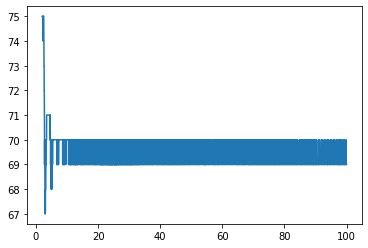

In [154]:
plt.plot(x, y)
plt.show()

In [156]:
store

{2.0: 75,
 2.01: 75,
 2.02: 75,
 2.03: 75,
 2.04: 75,
 2.05: 75,
 2.06: 75,
 2.07: 75,
 2.08: 75,
 2.09: 75,
 2.1: 75,
 2.11: 75,
 2.12: 75,
 2.13: 75,
 2.14: 75,
 2.15: 75,
 2.16: 75,
 2.17: 75,
 2.18: 75,
 2.19: 75,
 2.2: 75,
 2.21: 75,
 2.22: 75,
 2.23: 75,
 2.24: 75,
 2.25: 75,
 2.26: 75,
 2.27: 75,
 2.2800000000000002: 74,
 2.29: 75,
 2.3: 75,
 2.31: 75,
 2.32: 75,
 2.33: 75,
 2.34: 75,
 2.35: 75,
 2.36: 75,
 2.37: 75,
 2.38: 75,
 2.39: 75,
 2.4: 75,
 2.41: 75,
 2.42: 75,
 2.43: 75,
 2.44: 75,
 2.45: 75,
 2.46: 75,
 2.47: 75,
 2.48: 75,
 2.49: 75,
 2.5: 75,
 2.51: 74,
 2.52: 75,
 2.5300000000000002: 74,
 2.54: 74,
 2.55: 74,
 2.56: 74,
 2.5700000000000003: 73,
 2.58: 74,
 2.59: 73,
 2.6: 73,
 2.61: 73,
 2.62: 73,
 2.63: 72,
 2.64: 73,
 2.65: 72,
 2.66: 72,
 2.67: 72,
 2.68: 72,
 2.69: 71,
 2.7: 72,
 2.71: 71,
 2.7199999999999998: 71,
 2.73: 71,
 2.74: 71,
 2.75: 70,
 2.76: 71,
 2.77: 70,
 2.7800000000000002: 69,
 2.79: 70,
 2.8: 70,
 2.81: 69,
 2.8200000000000003: 69,
 2.83: 69,
 